In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [30]:
gun_df = pd.read_csv('gun-violence-data_01-2013_03-2018.csv')
gun_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   incident_id                  239677 non-null  int64  
 1   date                         239677 non-null  object 
 2   state                        239677 non-null  object 
 3   city_or_county               239677 non-null  object 
 4   address                      223180 non-null  object 
 5   n_killed                     239677 non-null  int64  
 6   n_injured                    239677 non-null  int64  
 7   incident_url                 239677 non-null  object 
 8   source_url                   239209 non-null  object 
 9   incident_url_fields_missing  239677 non-null  bool   
 10  congressional_district       227733 non-null  float64
 11  gun_stolen                   140179 non-null  object 
 12  gun_type                     140226 non-null  object 
 13 

In [31]:
gun_df.drop_duplicates(subset ="incident_id",keep = False, inplace = True)    #dropped all duplicates

In [32]:
gun_df=gun_df.drop(['city_or_county' , 'address' , 'incident_url' , 'source_url' , 'incident_url_fields_missing',
             'congressional_district' ,'gun_stolen' , 'gun_type' , 'latitude' , 'location_description' ,
             'longitude' , 'n_guns_involved' , 'notes' , 'participant_name' ,'participant_age',
             'participant_relationship' , 'sources' , 'state_house_district' , 'state_senate_district'], axis=1)

gun_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239677 entries, 0 to 239676
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   incident_id               239677 non-null  int64 
 1   date                      239677 non-null  object
 2   state                     239677 non-null  object
 3   n_killed                  239677 non-null  int64 
 4   n_injured                 239677 non-null  int64 
 5   incident_characteristics  239351 non-null  object
 6   participant_age_group     197558 non-null  object
 7   participant_gender        203315 non-null  object
 8   participant_status        212051 non-null  object
 9   participant_type          214814 non-null  object
dtypes: int64(3), object(7)
memory usage: 20.1+ MB


In [33]:
gun_df['date'] = pd.to_datetime(gun_df['date'])
gun_df['date'] = pd.DatetimeIndex(gun_df['date'])
year = pd.DatetimeIndex(gun_df['date']).year.value_counts()
year = year.rename_axis("Year")

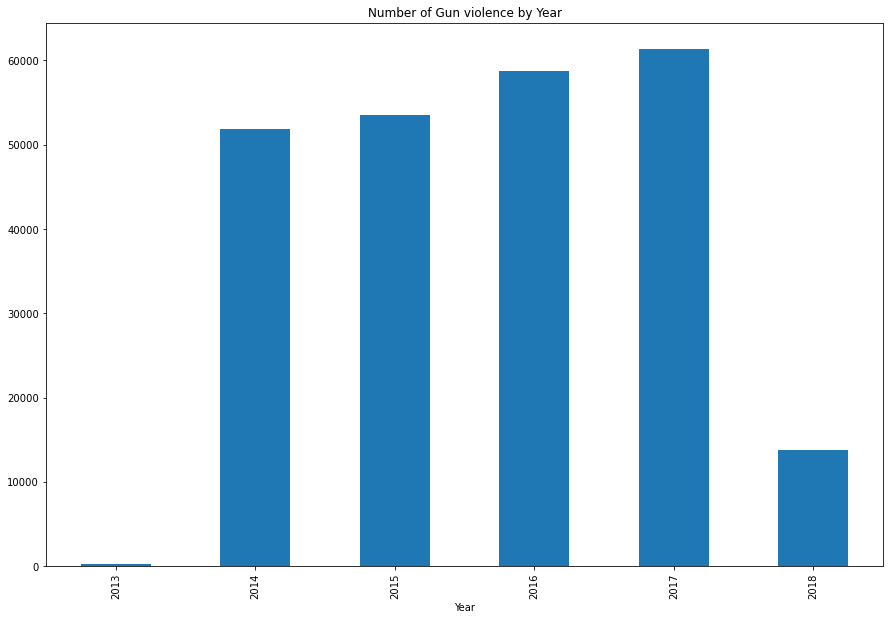

In [34]:
ax = year.sort_index().plot.bar(title = "Number of Gun violence by Year", figsize=(15,10))
plt.show()

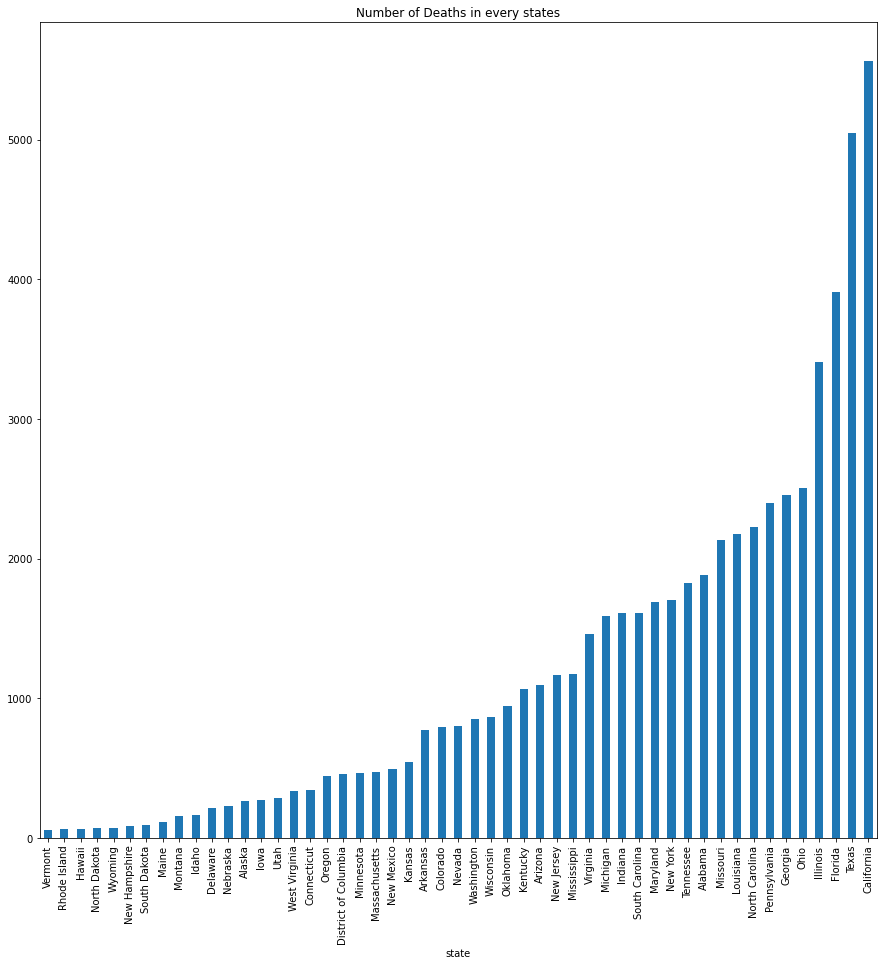

In [35]:
bx=gun_df.groupby('state').agg('sum')['n_killed'].sort_values().plot(kind='bar', figsize = (15,15), title="Number of Deaths in every states")
plt.show()

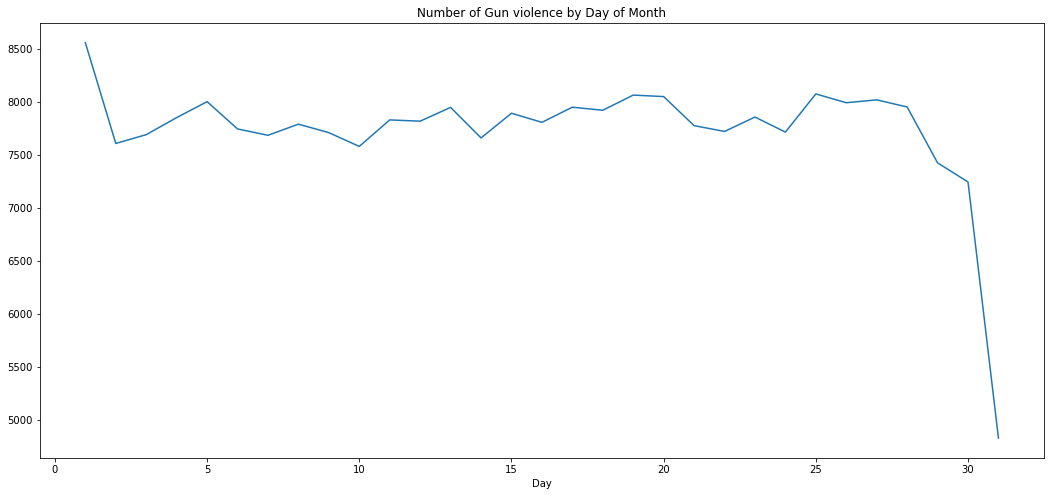

In [36]:
year = pd.DatetimeIndex(gun_df['date']).day.value_counts()
year = year.rename_axis("Day")
year.sort_index().plot(kind='line', title = "Number of Gun violence by Day of Month", figsize=(18,8))
plt.show()

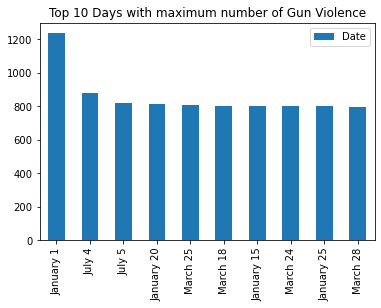

In [37]:
gun_df['year'] = pd.DatetimeIndex(gun_df['date']).year
gun_df['month'] = pd.DatetimeIndex(gun_df['date']).month_name()
gun_df['day'] = pd.DatetimeIndex(gun_df['date']).day

gun_df['monthandday'] = gun_df['month'].map(str) + " "+ gun_df['day'].map(str)

daydf = pd.DataFrame(gun_df['monthandday'].value_counts())
daydf = daydf.rename(index=str, columns={'monthandday' :'Date'})

daydf[0:10].plot(kind ='bar', title="Top 10 Days with maximum number of Gun Violence")
plt.show()

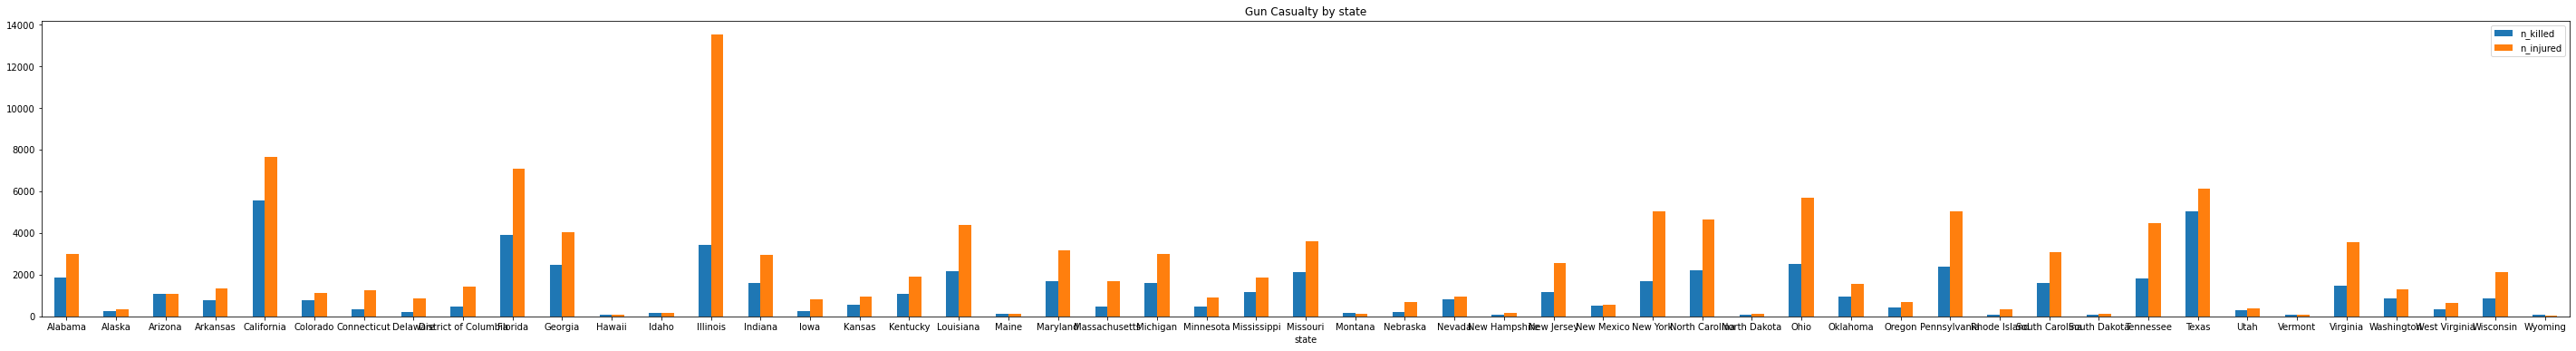

In [38]:
df = gun_df.groupby('state').agg('sum')[['n_killed','n_injured']]
df.plot(kind='bar', rot=0, figsize = (50,6), title="Gun Casualty by state")
plt.show()

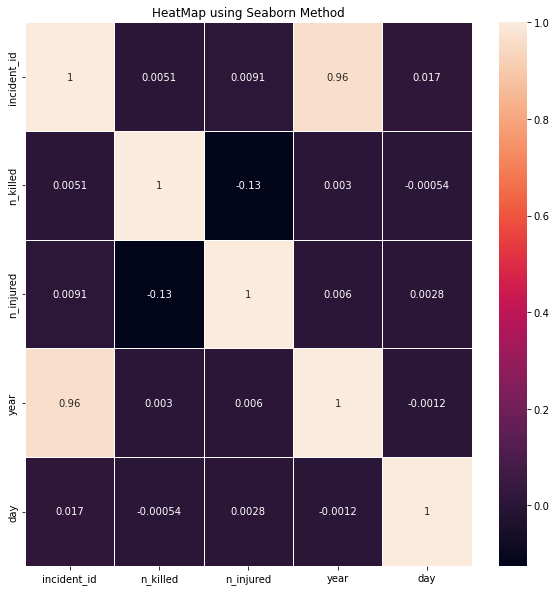

In [39]:
#correlation
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
heat_map = sns.heatmap( gun_df.corr(), linewidth = 1 , annot = True)
plt.title( "HeatMap using Seaborn Method" )
plt.show()

In [40]:
#Binary Encoding
gun_df["state"] = gun_df["state"].astype('category')
gun_df["state"] = gun_df["state"].cat.codes

gun_df

,incident_id,date,state,n_killed,n_injured,incident_characteristics,participant_age_group,participant_gender,participant_status,participant_type,year,month,day,monthandday
0,461105,2013-01-01,38,0,4,Shot - Wounded/Injured||Mass Shooting (4+ vict...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2013,January,1,January 1
1,460726,2013-01-01,4,1,3,"Shot - Wounded/Injured||Shot - Dead (murder, a...",0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2013,January,1,January 1
2,478855,2013-01-01,35,1,3,"Shot - Wounded/Injured||Shot - Dead (murder, a...",0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,2013,January,1,January 1
3,478925,2013-01-05,5,4,0,"Shot - Dead (murder, accidental, suicide)||Off...",0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,2013,January,5,January 5
4,478959,2013-01-07,33,2,2,"Shot - Wounded/Injured||Shot - Dead (murder, a...",0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,2013,January,7,January 7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239672,1083142,2018-03-31,18,0,0,Shots Fired - No Injuries,0::Adult 18+,0::Female,"0::Unharmed, Arrested",0::Subject-Suspect,2018,March,31,March 31
239673,1083139,2018-03-31,18,1,0,"Shot - Dead (murder, accidental, suicide)||Ins...",0::Adult 18+||1::Adult 18+,0::Male||1::Male,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,2018,March,31,March 31
239674,1083151,2018-03-31,18,0,1,Shot - Wounded/Injured,0::Adult 18+,0::Male,0::Injured,0::Victim,2018,March,31,March 31
239675,1082514,2018-03-31,43,1,0,"Shot - Dead (murder, accidental, suicide)",0::Adult 18+,0::Male,0::Killed,0::Victim,2018,March,31,March 31


In [41]:
#Standardization helps your model converge faster and fit the data better.
features = ['state','n_injured']
target = ['n_killed']

X = gun_df[features].values
Y = gun_df[target].values.ravel()

In [42]:
gun_df.head()

,incident_id,date,state,n_killed,n_injured,incident_characteristics,participant_age_group,participant_gender,participant_status,participant_type,year,month,day,monthandday
0,461105,2013-01-01,38,0,4,Shot - Wounded/Injured||Mass Shooting (4+ vict...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2013,January,1,January 1
1,460726,2013-01-01,4,1,3,"Shot - Wounded/Injured||Shot - Dead (murder, a...",0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2013,January,1,January 1
2,478855,2013-01-01,35,1,3,"Shot - Wounded/Injured||Shot - Dead (murder, a...",0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,2013,January,1,January 1
3,478925,2013-01-05,5,4,0,"Shot - Dead (murder, accidental, suicide)||Off...",0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,2013,January,5,January 5
4,478959,2013-01-07,33,2,2,"Shot - Wounded/Injured||Shot - Dead (murder, a...",0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,2013,January,7,January 7


In [43]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
X

array([[ 1.0011294 ,  4.80305483],
       [-1.35573131,  3.4330994 ],
       [ 0.7931711 ,  3.4330994 ],
       ...,
       [-0.38525925,  0.69318852],
       [ 1.34772656, -0.67676691],
       [-0.31593982, -0.67676691]])

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [45]:
## Naive Bayes
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X, y = load_iris(return_X_y=True)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
gnb = GaussianNB()

In [47]:
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 30 points : 1


In [48]:
correct_prediction_1 = 0
for y_pred_1, y_true_1 in zip(y_pred, y_test):
    if y_pred_1 == y_true_1:
        correct_prediction_1 += 1

print("Accuracy is:", correct_prediction_1/len(y_test))

Accuracy is: 0.9666666666666667


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



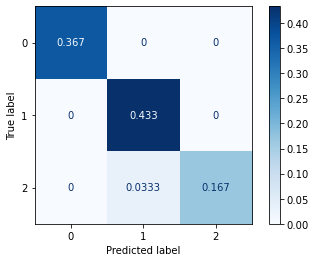

In [49]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")
print(classification_report(y_test, gnb.predict(X_test)))
plot_confusion_matrix(gnb, X_test, y_test,cmap="Blues",values_format='.3g', normalize = 'all')
plt.grid(False)